In [10]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # this is for visualization
import seaborn as sns # for visualization
%matplotlib inline
import statsmodels.formula.api as sm
import scipy, scipy.stats
import math # log function is inside this library
# this is used to get the plots inline i.e. in the same page
from collections import Counter

In [11]:
# read the csv file into a dataframe
df=pd.read_csv("/users/kamallochannayak/downloads/LGD_DATA.csv")

In [12]:
df.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands
0,150024,24,5,1,M,Married,203.319595
1,144880,31,10,1,F,Single,402.197302
2,133742,56,37,1,M,Married,553.132096
3,151282,52,31,1,F,Married,292.430579
4,174407,20,3,1,M,Single,246.540576


In [13]:
df.tail()

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands
15285,189499,61,43,4,F,Single,58.426429
15286,142111,69,48,4,F,Married,304.519134
15287,176444,69,51,4,F,Married,282.149148
15288,180420,22,4,4,M,Married,822.470554
15289,157201,20,2,4,F,Married,406.924740


In [14]:
#to check NULL values
df.info()
#so,there is no NULL values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15290 entries, 0 to 15289
Data columns (total 7 columns):
Ac_No                  15290 non-null int64
Age                    15290 non-null int64
Years of Experience    15290 non-null int64
Number of Vehicles     15290 non-null int64
Gender                 15290 non-null object
Married                15290 non-null object
Losses in Thousands    15290 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 836.2+ KB


In [18]:
df

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands
0,150024,24,5,1,M,Married,203.319595
1,144880,31,10,1,F,Single,402.197302
2,133742,56,37,1,M,Married,553.132096
3,151282,52,31,1,F,Married,292.430579
4,174407,20,3,1,M,Single,246.540576
5,142548,29,8,1,M,Married,384.676395
6,183396,36,19,1,F,Single,462.158856
7,106838,67,49,1,F,Married,168.934036
8,137434,69,48,1,M,Single,69.893041
9,192628,16,0,1,F,Single,242.772576


In [19]:
df['Gender'].value_counts()  #to check how many male females are there

F    7747
M    7543
Name: Gender, dtype: int64

In [20]:
df.sum()  #to check null values

Ac_No                                                         2292915759
Age                                                               647199
Years of Experience                                               362876
Number of Vehicles                                                 38162
Gender                 MFMFMMFFMFMFFMMMMMMMFMFFFMFMFFFMMMFMMMFFMMFMMM...
Married                MarriedSingleMarriedMarriedSingleMarriedSingle...
Losses in Thousands                                          5.96096e+06
dtype: object

In [23]:
df.isnull().sum() #it shows howmany null values are present column wise

Ac_No                  0
Age                    0
Years of Experience    0
Number of Vehicles     0
Gender                 0
Married                0
Losses in Thousands    0
dtype: int64

(array([  7.,   5.,   3.,   4.,   5.,   5.,   5.,   4.,   5.,   2.,   6.,
          3.,   4.,   6.,   7.,   5.,   4.,   5.,   3.,  12.]),
 array([  33.  ,   81.25,  129.5 ,  177.75,  226.  ,  274.25,  322.5 ,
         370.75,  419.  ,  467.25,  515.5 ,  563.75,  612.  ,  660.25,
         708.5 ,  756.75,  805.  ,  853.25,  901.5 ,  949.75,  998.  ]),
 <a list of 20 Patch objects>)

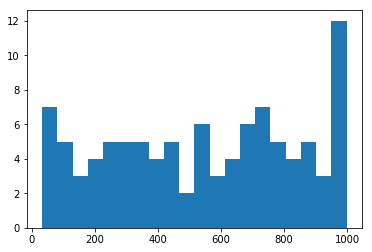

In [33]:
#draw histogram
from random import sample
data=sample(range(1,1000),100)
plt.hist(data,bins=20)   #plot is right skewed means data is not normally distributed
#we can take log of data so that it will look like normally distributed

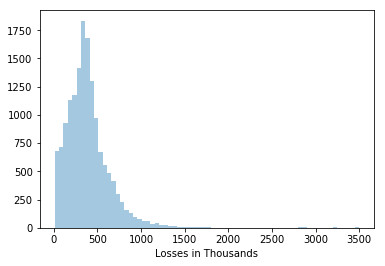

In [42]:
import seaborn as sns
#to plot histograms
sns.distplot(df['Losses in Thousands'],kde=False,bins=70)

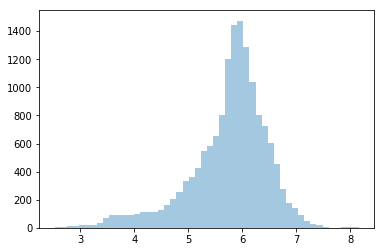

In [43]:
# this probably means we shud take the log to normalize the data
sns.distplot(map(math.log,df['Losses in Thousands']),kde=False,bins=50)
# map function is used to apply any function on each element of a series/list
# now the distribution looks normal

{'boxes': [<matplotlib.patches.PathPatch at 0x1a125218d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1241a0d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1241acd0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1241a8d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1a12521b50>,
  <matplotlib.lines.Line2D at 0x1a12438690>]}

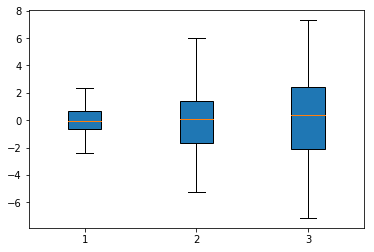

In [34]:
#box plot
data=[np.random.normal(0,std,100) for std in range(1,4)]
plt.boxplot(data,vert=True,patch_artist=True)   #vert means vertival


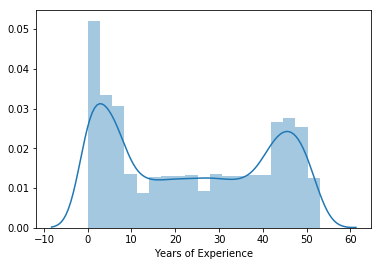

In [37]:
#distplot
sns.distplot(df['Years of Experience'])

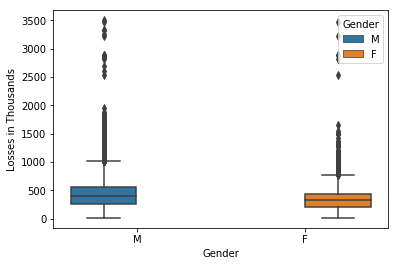

In [44]:
#Box plot
sns.boxplot(x="Gender",y="Losses in Thousands",data=df,hue="Gender")

In [46]:
#create new column and put log of dependent variable
df['new_col']=np.log(df['Losses in Thousands'])

In [47]:
df


,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands,new_col
0,150024,24,5,1,M,Married,203.319595,5.314779
1,144880,31,10,1,F,Single,402.197302,5.996943
2,133742,56,37,1,M,Married,553.132096,6.315597
3,151282,52,31,1,F,Married,292.430579,5.678227
4,174407,20,3,1,M,Single,246.540576,5.507527
5,142548,29,8,1,M,Married,384.676395,5.952402
6,183396,36,19,1,F,Single,462.158856,6.135909
7,106838,67,49,1,F,Married,168.934036,5.129508
8,137434,69,48,1,M,Single,69.893041,4.246966
9,192628,16,0,1,F,Single,242.772576,5.492125


In [53]:
#do the same as map function
df['new_colone']=map(math.log,df['Losses in Thousands'])

In [54]:
df

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands,new_col,new_colone
0,150024,24,5,1,M,Married,203.319595,5.314779,5.314779
1,144880,31,10,1,F,Single,402.197302,5.996943,5.996943
2,133742,56,37,1,M,Married,553.132096,6.315597,6.315597
3,151282,52,31,1,F,Married,292.430579,5.678227,5.678227
4,174407,20,3,1,M,Single,246.540576,5.507527,5.507527
5,142548,29,8,1,M,Married,384.676395,5.952402,5.952402
6,183396,36,19,1,F,Single,462.158856,6.135909,6.135909
7,106838,67,49,1,F,Married,168.934036,5.129508,5.129508
8,137434,69,48,1,M,Single,69.893041,4.246966,4.246966
9,192628,16,0,1,F,Single,242.772576,5.492125,5.492125


In [57]:
#using lambda function
df['new_coltwo']=map(lambda x:np.log(x),df['Losses in Thousands'])

In [58]:
df

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands,new_col,new_colone,new_coltwo
0,150024,24,5,1,M,Married,203.319595,5.314779,5.314779,5.314779
1,144880,31,10,1,F,Single,402.197302,5.996943,5.996943,5.996943
2,133742,56,37,1,M,Married,553.132096,6.315597,6.315597,6.315597
3,151282,52,31,1,F,Married,292.430579,5.678227,5.678227,5.678227
4,174407,20,3,1,M,Single,246.540576,5.507527,5.507527,5.507527
5,142548,29,8,1,M,Married,384.676395,5.952402,5.952402,5.952402
6,183396,36,19,1,F,Single,462.158856,6.135909,6.135909,6.135909
7,106838,67,49,1,F,Married,168.934036,5.129508,5.129508,5.129508
8,137434,69,48,1,M,Single,69.893041,4.246966,4.246966,4.246966
9,192628,16,0,1,F,Single,242.772576,5.492125,5.492125,5.492125


In [61]:
#using comprehension
df['newcol_three']=[np.log(i) for i in df['Losses in Thousands']]

In [62]:
df

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands,new_col,new_colone,new_coltwo,necol_three,newcol_three
0,150024,24,5,1,M,Married,203.319595,5.314779,5.314779,5.314779,5.314779,5.314779
1,144880,31,10,1,F,Single,402.197302,5.996943,5.996943,5.996943,5.996943,5.996943
2,133742,56,37,1,M,Married,553.132096,6.315597,6.315597,6.315597,6.315597,6.315597
3,151282,52,31,1,F,Married,292.430579,5.678227,5.678227,5.678227,5.678227,5.678227
4,174407,20,3,1,M,Single,246.540576,5.507527,5.507527,5.507527,5.507527,5.507527
5,142548,29,8,1,M,Married,384.676395,5.952402,5.952402,5.952402,5.952402,5.952402
6,183396,36,19,1,F,Single,462.158856,6.135909,6.135909,6.135909,6.135909,6.135909
7,106838,67,49,1,F,Married,168.934036,5.129508,5.129508,5.129508,5.129508,5.129508
8,137434,69,48,1,M,Single,69.893041,4.246966,4.246966,4.246966,4.246966,4.246966
9,192628,16,0,1,F,Single,242.772576,5.492125,5.492125,5.492125,5.492125,5.492125


In [63]:
#find correlation
df.corr()
#high correlation between age and Years of Experience which is obivious!!

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands,new_col,new_colone,new_coltwo,necol_three,newcol_three
Ac_No,1.000000,0.008291,0.008437,-0.003056,-0.000794,-0.001057,-0.001057,-0.001057,-0.001057,-0.001057
Age,0.008291,1.000000,0.997161,0.008366,-0.442962,-0.509823,-0.509823,-0.509823,-0.509823,-0.509823
Years of Experience,0.008437,0.997161,1.000000,0.008545,-0.442115,-0.511495,-0.511495,-0.511495,-0.511495,-0.511495
Number of Vehicles,-0.003056,0.008366,0.008545,1.000000,-0.011553,-0.004839,-0.004839,-0.004839,-0.004839,-0.004839
Losses in Thousands,-0.000794,-0.442962,-0.442115,-0.011553,1.000000,0.849515,0.849515,0.849515,0.849515,0.849515
new_col,-0.001057,-0.509823,-0.511495,-0.004839,0.849515,1.000000,1.000000,1.000000,1.000000,1.000000
new_colone,-0.001057,-0.509823,-0.511495,-0.004839,0.849515,1.000000,1.000000,1.000000,1.000000,1.000000
new_coltwo,-0.001057,-0.509823,-0.511495,-0.004839,0.849515,1.000000,1.000000,1.000000,1.000000,1.000000
necol_three,-0.001057,-0.509823,-0.511495,-0.004839,0.849515,1.000000,1.000000,1.000000,1.000000,1.000000
newcol_three,-0.001057,-0.509823,-0.511495,-0.004839,0.849515,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
#R automatically creates dummy variables
#for Python we have to create dummy variable
dummy_var1=pd.get_dummies(df['Gender'],drop_first=True)

print( (dummy_var1.head()))

   M
0  1
1  0
2  1
3  0
4  1


In [66]:
#without drop
dummy_var=pd.get_dummies(df['Gender'])

print( (dummy_var.head()))

   F  M
0  0  1
1  1  0
2  0  1
3  1  0
4  0  1


In [68]:
dummy_var2=pd.get_dummies(df['Married'],drop_first=True)

print( (dummy_var2.head()))

   Single
0       0
1       1
2       0
3       0
4       1


In [69]:
#merge above 2 dataframe with original dataframe
df_new=pd.concat([df,dummy_var1,dummy_var2],axis=1)
df_new

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands,new_col,new_colone,new_coltwo,necol_three,newcol_three,M,Single
0,150024,24,5,1,M,Married,203.319595,5.314779,5.314779,5.314779,5.314779,5.314779,1,0
1,144880,31,10,1,F,Single,402.197302,5.996943,5.996943,5.996943,5.996943,5.996943,0,1
2,133742,56,37,1,M,Married,553.132096,6.315597,6.315597,6.315597,6.315597,6.315597,1,0
3,151282,52,31,1,F,Married,292.430579,5.678227,5.678227,5.678227,5.678227,5.678227,0,0
4,174407,20,3,1,M,Single,246.540576,5.507527,5.507527,5.507527,5.507527,5.507527,1,1
5,142548,29,8,1,M,Married,384.676395,5.952402,5.952402,5.952402,5.952402,5.952402,1,0
6,183396,36,19,1,F,Single,462.158856,6.135909,6.135909,6.135909,6.135909,6.135909,0,1
7,106838,67,49,1,F,Married,168.934036,5.129508,5.129508,5.129508,5.129508,5.129508,0,0
8,137434,69,48,1,M,Single,69.893041,4.246966,4.246966,4.246966,4.246966,4.246966,1,1
9,192628,16,0,1,F,Single,242.772576,5.492125,5.492125,5.492125,5.492125,5.492125,0,1


In [70]:
#now we no longer need Married and gender Columns. We will use their
#dummies instead
df_new2=df_new.drop(['Gender','Married'],axis=1)
df_new2.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands,new_col,new_colone,new_coltwo,necol_three,newcol_three,M,Single
0,150024,24,5,1,203.319595,5.314779,5.314779,5.314779,5.314779,5.314779,1,0
1,144880,31,10,1,402.197302,5.996943,5.996943,5.996943,5.996943,5.996943,0,1
2,133742,56,37,1,553.132096,6.315597,6.315597,6.315597,6.315597,6.315597,1,0
3,151282,52,31,1,292.430579,5.678227,5.678227,5.678227,5.678227,5.678227,0,0
4,174407,20,3,1,246.540576,5.507527,5.507527,5.507527,5.507527,5.507527,1,1


In [96]:
#decide regressor and predictor variables
#decide your regressor and predictor variables
x=df_new2[["Age","Number of Vehicles","M","Single"]]
y=df_new2["Losses in Thousands"]
#split the data into train and test
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
from sklearn.linear_model import LinearRegression # import the functions
lm=LinearRegression() #call the function
lm.fit(x_train,y_train)# fit the model
print(lm.intercept_) # see the intercept
print(lm.coef_)# see the betas
#see the error parameters
from sklearn import metrics
#make prediction
pred=lm.predict(x_test)

from sklearn.metrics import r2_score
print r2_score(y_test, pred)
print metrics.mean_absolute_error(y_test,pred)

539.656523011
[  -6.14900704   -1.79059246   97.23493268  136.7922503 ]
0.295052575449
148.508192122


In [101]:
#lets get the P values of each predictors 
from statsmodels.api import add_constant
X2 = add_constant(x_train)
lm= sm.OLS(y_train,X2)
lm2=lm.fit()
lm2.pvalues
# sm.OLS by default does not add an intercept in the model.
#so we manually added it by the first line

const                  0.000000e+00
Age                    0.000000e+00
Number of Vehicles     4.052234e-01
M                     1.470589e-121
Single                6.953054e-233
dtype: float64

In [102]:
#to see summary
print(lm2.summary())

                             OLS Regression Results                            
Dep. Variable:     Losses in Thousands   R-squared:                       0.305
Model:                             OLS   Adj. R-squared:                  0.304
Method:                  Least Squares   F-statistic:                     1171.
Date:                 Sat, 11 Nov 2017   Prob (F-statistic):               0.00
Time:                         19:29:51   Log-Likelihood:                -72503.
No. Observations:                10703   AIC:                         1.450e+05
Df Residuals:                    10698   BIC:                         1.451e+05
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                539.6

In [109]:
#to get better model
#decide your regressor and predictor variables
x=df_new2[["Age","M","Single"]]
y=df_new2["new_col"]
df_new2.head()
#split the data into train and test
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
from sklearn.linear_model import LinearRegression # import the functions
lm=LinearRegression() #call the function
lm.fit(x_train,y_train)# fit the model
print(lm.intercept_) # see the intercept
print(lm.coef_)# see the betas
#see the error parameters
from sklearn import metrics
#make prediction
pred=lm.predict(x_test)

from sklearn.metrics import r2_score
print r2_score(y_test, pred)
print metrics.mean_absolute_error(y_test,pred)

6.35057449248
[-0.02044524  0.21452747  0.31708906]
0.325189439306
0.455474750008


In [110]:
#lets get the P values of each predictors 
from statsmodels.api import add_constant
X2 = add_constant(x_train)
lm= sm.OLS(y_train,X2)
lm2=lm.fit()
lm2.pvalues
# sm.OLS by default does not add an intercept in the model.
#so we manually added it by the first line

const      0.000000e+00
Age        0.000000e+00
M          3.240406e-74
Single    5.117085e-157
dtype: float64

In [111]:
#to see summary
print(lm2.summary())
#didnt get much difference from previous model

                            OLS Regression Results                            
Dep. Variable:                new_col   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     1721.
Date:                Sat, 11 Nov 2017   Prob (F-statistic):               0.00
Time:                        19:40:55   Log-Likelihood:                -9789.8
No. Observations:               10703   AIC:                         1.959e+04
Df Residuals:                   10699   BIC:                         1.962e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3506      0.017    377.312      0.0

In [130]:
#Let us try to improve the model
#we will try the following
# take log of the dependent variable
# create a new variable AGECATEGORY which is "Young" if age<28, "MiddleAged" if 28<age<58
#and "old" if Age>58
#create categorical value from continuous variable
df_new2['AGECATEGORY']=['Young' if df_new2['Age'][i] <=28  else 'Middle Aged' if 28<df_new2['Age'][i]<58 else 'Old' for i in range(len(df_new2))]
df_new2.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands,new_col,new_colone,new_coltwo,necol_three,newcol_three,M,Single,AGECATEGORY,Logy
0,150024,24,5,1,203.319595,5.314779,5.314779,5.314779,5.314779,5.314779,1,0,Young,5.314779
1,144880,31,10,1,402.197302,5.996943,5.996943,5.996943,5.996943,5.996943,0,1,Middle Aged,5.996943
2,133742,56,37,1,553.132096,6.315597,6.315597,6.315597,6.315597,6.315597,1,0,Middle Aged,6.315597
3,151282,52,31,1,292.430579,5.678227,5.678227,5.678227,5.678227,5.678227,0,0,Middle Aged,5.678227
4,174407,20,3,1,246.540576,5.507527,5.507527,5.507527,5.507527,5.507527,1,1,Young,5.507527


In [131]:
#apply log function for dependent variable
df_new2['Logy']=map(math.log,df_new2['Losses in Thousands'])
df_new2.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands,new_col,new_colone,new_coltwo,necol_three,newcol_three,M,Single,AGECATEGORY,Logy
0,150024,24,5,1,203.319595,5.314779,5.314779,5.314779,5.314779,5.314779,1,0,Young,5.314779
1,144880,31,10,1,402.197302,5.996943,5.996943,5.996943,5.996943,5.996943,0,1,Middle Aged,5.996943
2,133742,56,37,1,553.132096,6.315597,6.315597,6.315597,6.315597,6.315597,1,0,Middle Aged,6.315597
3,151282,52,31,1,292.430579,5.678227,5.678227,5.678227,5.678227,5.678227,0,0,Middle Aged,5.678227
4,174407,20,3,1,246.540576,5.507527,5.507527,5.507527,5.507527,5.507527,1,1,Young,5.507527
